In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the data set
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
#Prepare X and Y data set
X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 
'comes_furnished', 'laundry_options', 'parking_options', 'state', 'pets_allowed']]  # Features

y=df['type']  # Labels

#Splitting the data set into Train set & Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.75)

In [4]:
#Model Building

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
svm_clf = SVC()

vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

vot_clf.fit(x_train, y_train)

for clf in(log_clf, rnd_clf, svm_clf, vot_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)



In [5]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 86.87909022637056


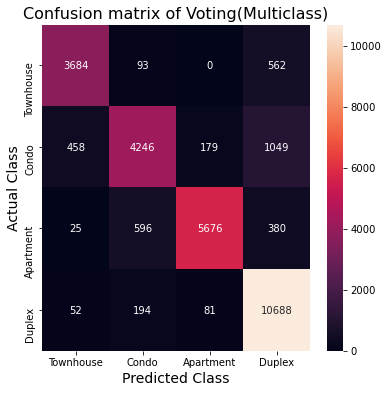

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plot the Confusion Matrix
LABELS = ['Townhouse', 'Condo', 'Apartment', 'Duplex']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Voting(Multiclass)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()